In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import re
import uuid

In [2]:
# Read dataset

df = pd.read_csv('tsa_claims.csv', date_parser=True)
df

C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\788509952.py:3: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('tsa_claims.csv', date_parser=True)


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2.01E+17,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204258,202000000000000000.0,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204259,202000000000000000.0,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204260,202000000000000000.0,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204261,202000000000000000.0,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


In [3]:
df.isna().sum()

Claim Number         0
Date Received      259
Incident Date     2179
Airport Code      8520
Airport Name      8520
Airline Name     34370
Claim Type        7909
Claim Site         736
Item              3962
Claim Amount      4039
Status               1
Close Amount     68948
Disposition      72904
dtype: int64

In [4]:
# # Drop if there is all blank row

# df.dropna(how='all',inplace=True)
# df.reset_index(drop=True,inplace=True)
# df.isna().sum()

In [5]:
# Replace 'Claim Number' with new one

def new_id(X) :
    return str(uuid.uuid4()).split('-')[-1]

df['Claim Number'] = df['Claim Number'].apply(new_id)

df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,cf0e4681d1f8,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,311aa10a78f4,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,b7201929429e,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,9bd704b4fa0e,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,932fb16507ff,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204258,cd56f6c94370,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204259,89ffb810c328,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204260,76f0beaf560b,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204261,f6100bc9b68e,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


In [6]:
# Check 'Claim Number' duplicates

df['Claim Number'].duplicated().value_counts()

False    204263
Name: Claim Number, dtype: int64

In [7]:
# Matching format for datetime type
# This case 'Date Received' and 'Incident Date'

def formating_date(X):
    if type(X) == str:
        new_format = re.findall(pattern= '(\d+/\d+/\d{4}|\d+-\w+-\d{2})',string=X)
        return new_format[0]
    else:
        return X

In [8]:
# Matching format for 'Date Received'
df['Date Received'] = df['Date Received'].apply(formating_date)
df['Date Received']

0          4-Jan-02
1          2-Feb-02
2          4-Feb-02
3          7-Feb-02
4         18-Feb-02
            ...    
204258    20-Nov-15
204259    17-Dec-15
204260    22-Dec-15
204261    30-Dec-15
204262    31-Dec-15
Name: Date Received, Length: 204263, dtype: object

In [9]:
# Convert 'Date Received' to datetime type
df['Date Received'] = pd.to_datetime(df['Date Received'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204263 entries, 0 to 204262
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204263 non-null  object        
 1   Date Received  204004 non-null  datetime64[ns]
 2   Incident Date  202084 non-null  object        
 3   Airport Code   195743 non-null  object        
 4   Airport Name   195743 non-null  object        
 5   Airline Name   169893 non-null  object        
 6   Claim Type     196354 non-null  object        
 7   Claim Site     203527 non-null  object        
 8   Item           200301 non-null  object        
 9   Claim Amount   200224 non-null  object        
 10  Status         204262 non-null  object        
 11  Close Amount   135315 non-null  object        
 12  Disposition    131359 non-null  object        
dtypes: datetime64[ns](1), object(12)
memory usage: 20.3+ MB


In [10]:
# Matching format for 'Incident Date'
df['Incident Date'] = df['Incident Date'].apply(formating_date)
df['Incident Date']

0         12/12/2002
1          1/16/2004
2         11/26/2003
3           1/6/2003
4           2/5/2005
             ...    
204258     16-Oct-15
204259      2-Dec-15
204260     20-Dec-15
204261     28-Dec-15
204262     23-Nov-15
Name: Incident Date, Length: 204263, dtype: object

In [11]:
#Convert 'Incident Date' to datetime
df['Incident Date'] = pd.to_datetime(df['Incident Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204263 entries, 0 to 204262
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204263 non-null  object        
 1   Date Received  204004 non-null  datetime64[ns]
 2   Incident Date  202084 non-null  datetime64[ns]
 3   Airport Code   195743 non-null  object        
 4   Airport Name   195743 non-null  object        
 5   Airline Name   169893 non-null  object        
 6   Claim Type     196354 non-null  object        
 7   Claim Site     203527 non-null  object        
 8   Item           200301 non-null  object        
 9   Claim Amount   200224 non-null  object        
 10  Status         204262 non-null  object        
 11  Close Amount   135315 non-null  object        
 12  Disposition    131359 non-null  object        
dtypes: datetime64[ns](2), object(11)
memory usage: 20.3+ MB


In [12]:
# Adjust 'Incident Date' year, if 'Incident Date' > 'Date Received'
# This will make received column happen after incident
for i in range(len(df)):

    if pd.notna(df['Incident Date'][i]) == True and pd.notna(df['Date Received'][i]) == True :

        incident_overdue = df['Incident Date'][i] > df['Date Received'][i]

        if incident_overdue == True :
            df['Incident Date'][i] = df['Incident Date'][i].replace(year=df['Date Received'][i].year)

df

C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\316227162.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Incident Date'][i] = df['Incident Date'][i].replace(year=df['Date Received'][i].year)


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,cf0e4681d1f8,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,311aa10a78f4,2002-02-02,2002-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,b7201929429e,2002-02-04,2002-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,9bd704b4fa0e,2002-02-07,2002-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,932fb16507ff,2002-02-18,2002-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204258,cd56f6c94370,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204259,89ffb810c328,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204260,76f0beaf560b,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204261,f6100bc9b68e,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


In [13]:
# Find 'Incident Date' and 'Date Received' measure tendency
n_days = []
for i in range(len(df)):

    if pd.notna(df['Incident Date'][i]) == True and pd.notna(df['Date Received'][i]) == True :

        days_diff = df['Date Received'][i] - df['Incident Date'][i]
        days_diff = days_diff.days

        if days_diff > 0:
            n_days.append(days_diff)

n_days = pd.DataFrame({'diff':n_days})
diff_median = n_days['diff'].median()
diff_median

23.0

In [14]:
# Fill blank 'Date Received' and 'Incident Date'
df[['Date Received','Incident Date']].isna().sum()

Date Received     259
Incident Date    2179
dtype: int64

In [15]:
# Fill blank 'Date Receive' by 'Incident Date'
# Unfilled 'Date Received' has decrease from 259 to 120
df['Date Received'] = df['Date Received'].fillna(df['Incident Date']+timedelta(days=diff_median))
df[['Date Received','Incident Date']].isna().sum()

Date Received     120
Incident Date    2179
dtype: int64

In [16]:
# Fill blank 'Incident Date' by 'Date Received'
# Unfilled 'Date Received' has decrease from 2179 to 120
df['Incident Date'] = df['Incident Date'].fillna(df['Date Received']-timedelta(days=diff_median))
df[['Date Received','Incident Date']].isna().sum()

Date Received    120
Incident Date    120
dtype: int64

In [17]:
# Re-calibration month & day, if 'Incident Date' > 'Date Received'
for i in range(len(df)):

    if pd.notna(df['Incident Date'][i]) == True and pd.notna(df['Incident Date'][i]) == True :

        incident_overdue = df['Incident Date'][i] > df['Date Received'][i]

        if incident_overdue == True :
            df['Incident Date'][i] = df['Date Received'][i] - timedelta(days=diff_median)

df

C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\2808343777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Incident Date'][i] = df['Date Received'][i] - timedelta(days=diff_median)


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,cf0e4681d1f8,2002-01-04,2001-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,311aa10a78f4,2002-02-02,2002-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,b7201929429e,2002-02-04,2002-01-12,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,9bd704b4fa0e,2002-02-07,2002-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,932fb16507ff,2002-02-18,2002-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204258,cd56f6c94370,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204259,89ffb810c328,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204260,76f0beaf560b,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204261,f6100bc9b68e,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


In [18]:
# Matching format and convert to float type
# This case it was 'Claim Amount' and 'Close Amount'

def price_to_number(X) : 
    if pd.notna(X) == True and X == '-' : # Replace '-' with 'NaN'
        return np.nan

    elif pd.notna(X) == True :
        return X.replace(';','').replace('$','')

    else : # Other than this data must be nan
        return X

In [19]:
# Matching format and convert to float type for 'Claim Amount'
df['Claim Amount'] = df['Claim Amount'].apply(price_to_number).astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204263 entries, 0 to 204262
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204263 non-null  object        
 1   Date Received  204143 non-null  datetime64[ns]
 2   Incident Date  204143 non-null  datetime64[ns]
 3   Airport Code   195743 non-null  object        
 4   Airport Name   195743 non-null  object        
 5   Airline Name   169893 non-null  object        
 6   Claim Type     196354 non-null  object        
 7   Claim Site     203527 non-null  object        
 8   Item           200301 non-null  object        
 9   Claim Amount   187472 non-null  float64       
 10  Status         204262 non-null  object        
 11  Close Amount   135315 non-null  object        
 12  Disposition    131359 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(10)
memory usage: 20.3+ MB


In [20]:
# Matching format and convert to float type for 'Close Amount'
df['Close Amount'] = df['Close Amount'].apply(price_to_number).astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204263 entries, 0 to 204262
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Claim Number   204263 non-null  object        
 1   Date Received  204143 non-null  datetime64[ns]
 2   Incident Date  204143 non-null  datetime64[ns]
 3   Airport Code   195743 non-null  object        
 4   Airport Name   195743 non-null  object        
 5   Airline Name   169893 non-null  object        
 6   Claim Type     196354 non-null  object        
 7   Claim Site     203527 non-null  object        
 8   Item           200301 non-null  object        
 9   Claim Amount   187472 non-null  float64       
 10  Status         204262 non-null  object        
 11  Close Amount   135315 non-null  float64       
 12  Disposition    131359 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 20.3+ MB


In [21]:
# Next convert '0' value to nan
# This was the case for 'Claim Amount'
# No want will claim '0' for their belongings

def zero_to_nan(X) :
    if X > 0 :
        return X
    else :
        return np.nan

In [22]:
# Now '0' become really '0'
df['Claim Amount'] = df['Claim Amount'].apply(zero_to_nan)
len(df[df['Claim Amount'] == 0])

0

In [23]:
# Next we will replace '-' in categorical column with nan

def nodesc_to_nan(X):
    if pd.notna(X) == True and X == '-' :
        return np.nan
    else :
        return X

In [24]:
df['Airport Code'] = df['Airport Code'].apply(nodesc_to_nan)
df['Airport Name'] = df['Airport Name'].apply(nodesc_to_nan)
df['Airline Name'] = df['Airline Name'].apply(nodesc_to_nan)
df['Claim Type'] = df['Claim Type'].apply(nodesc_to_nan)
df['Claim Site'] = df['Claim Site'].apply(nodesc_to_nan)
df['Item'] = df['Item'].apply(nodesc_to_nan)
df['Status'] = df['Status'].apply(nodesc_to_nan)
df['Close Amount'] = df['Close Amount'].apply(nodesc_to_nan)

# Now the amount of nan values increased
df.isna().sum()

Claim Number         0
Date Received      120
Incident Date      120
Airport Code      8961
Airport Name      8961
Airline Name     38617
Claim Type        8191
Claim Site        1012
Item              8385
Claim Amount     45236
Status           12753
Close Amount     68948
Disposition      72904
dtype: int64

In [25]:
# Next we will simplify all categorical columns
# This case was 'Claim Type', 'Claim Site', 'Item', and 'Status'

def cat_simplified(X):
    if pd.notna(X) == True :
        return X.split(' -')[0].split(';')[0].split(' (')[0]
    else :
        return X

In [26]:
df['Claim Type'] = df['Claim Type'].apply(cat_simplified)
df['Claim Site'] = df['Claim Site'].apply(cat_simplified)
df['Item'] = df['Item'].apply(cat_simplified)
df['Status'] = df['Status'].apply(cat_simplified)

df[['Claim Type', 'Claim Site', 'Item', 'Status']].head(20)

,Claim Type,Claim Site,Item,Status
0,Property Damage,Checkpoint,Other,Approved
1,Property Damage,Checked Baggage,Luggage,Settled
2,Property Damage,Checked Baggage,Cell Phones,Settled
3,Property Damage,Checkpoint,Luggage,Approved
4,Property Damage,Checkpoint,Baby,Approved
5,Passenger Property Loss,Checked Baggage,Other,Settled
6,Passenger Property Loss,Checked Baggage,Professional Equipment,Approved
7,NaN,Checkpoint,Clothing,Approved
8,Property Damage,Checkpoint,Computer,Canceled
9,Passenger Property Loss,Checkpoint,Jewelry,Denied


But for 'Status' column it need to simplified further,
<br>so we weill convert current categorize to a new one

<br>here is the rule :
<br>approved, approve in full -> approved
<br>settled, settle -> settled
<br>calceled -> cancel
<br>denied, deny -> denied
<br>insuff -> invalid
<br>contractor claim -> contractor claim
<br>nan -> np.nan
<br>other -> pending

In [27]:
def status_newcat(X):
    if pd.isna(X) == True:
        return X
    elif X == 'Approved' or X == 'Approve in Full' :
        return 'Approved'
    elif X == 'Settled' or X == 'Settle' :
        return 'Settled'
    elif X == 'Denied' or X == 'Deny' :
        return 'Denied'
    elif X == 'Canceled' :
        return 'Canceled'
    elif X == 'Insufficient' :
        return 'Invalid'
    elif X == 'Closed as a contractor claim' :
        return 'Contractor Claim'
    else :
        return 'Pending'

In [28]:
# New categorized done

df['Status'] = df['Status'].apply(status_newcat)
df['Status'].unique()

array(['Approved', 'Settled', 'Canceled', 'Denied', 'Invalid', 'Pending',
       'Contractor Claim', nan], dtype=object)

In [29]:
# Now we'll predict 'Claim Amount' by 'Status' or 'Item'
df[['Item','Claim Amount']].isna().sum()

Item             8385
Claim Amount    45236
dtype: int64

In [30]:
# Filled by 'Status'
df.reset_index(drop=True,inplace=True)

for i in range(len(df)):
    if pd.isna(df['Claim Amount'].iloc[i]) == True and df['Status'].iloc[i] == 'Approved' :
        df['Claim Amount'].iloc[i] = df['Close Amount'].iloc[i]

# Unfilled Claim Amount' has decreased from 45236 to 45033
df[['Item','Claim Amount']].isna().sum()

C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\1032537464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Claim Amount'].iloc[i] = df['Close Amount'].iloc[i]


Item             8385
Claim Amount    45033
dtype: int64

In [31]:
# Filled by Item
df['Claim Amount'] = df['Claim Amount'].fillna(df.groupby('Item')['Claim Amount'].transform('mean').round(2))

# Now unfilled Claim Amount' has decreased from 45236 to 3765
df[['Item','Claim Amount']].isna().sum()

Item            8385
Claim Amount    3765
dtype: int64

In [32]:
# Next we'll predict unfilled 'Item' by 'Claim Amount'
df[['Item','Claim Amount']].isna().sum()

Item            8385
Claim Amount    3765
dtype: int64

In [33]:
# Now we'll filled 'Item' by 'Claim Amount'

item_median = df.groupby('Item')[['Claim Amount']].median().reset_index()
item_median

,Item,Claim Amount
0,Alcoholic beverages,79.50
1,Artificial flowers & Fruits,5467.91
2,Audio,285.17
3,Audio/Video,200.40
4,Automobile Parts,307.67
...,...,...
125,Umbrellas,30.00
126,Video Recordings,400.00
127,Watches,350.00
128,Wedding Gowns,356.72


In [34]:
df.reset_index(drop=True,inplace=True)

for i in range(len(df)):
    if pd.isna(df['Item'].iloc[i]) == True and pd.notna(df['Claim Amount'].iloc[i]) == True :
        A = item_median['Claim Amount']
        B = df['Claim Amount'].iloc[i]
        item_median['difference'] = (A - B)**2
        closest_item = item_median[['Item','difference']].sort_values(by='difference').iloc[0][0]
        df['Item'].iloc[i] = closest_item


# Now unfilled 'Item' has decreased from 8385 to 3765

df[['Item','Claim Amount']].isna().sum()

C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\2162612189.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item'].iloc[i] = closest_item
C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\2162612189.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item'].iloc[i] = closest_item
C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\2162612189.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item'].iloc[i] = closest_ite

Item            3765
Claim Amount    3765
dtype: int64

In [35]:
# Now drop rows where both 'Item' and 'Claim Amount' unfilled
# Because 'Claim Amount' was the key for this dataset

df = df[~(df['Item'].isna()==True) & ~(df['Claim Amount'].isna()==True)]
df.isna().sum()

Claim Number         0
Date Received       21
Incident Date       21
Airport Code      8597
Airport Name      8597
Airline Name     37853
Claim Type        7813
Claim Site         662
Item                 0
Claim Amount         0
Status           10961
Close Amount     65370
Disposition      69153
dtype: int64

In [36]:
# Next we will fill 'Status' by 'Item'

a = df.groupby(by='Item')['Status'].value_counts().to_frame()
a.rename(columns={'Status':'Value'},inplace=True)
a = a.reset_index()

# Status modus by 'Item'
a['Rank'] = a.groupby(by='Item')['Value'].rank(method='dense',ascending=False)
status_by_item = a[a['Rank']==1][['Item','Status']].set_index(keys='Item')
status_by_item

,Status
Item,
Alcoholic beverages,Denied
Artificial flowers & Fruits,Denied
Audio,Denied
Audio/Video,Denied
Automobile Parts,Denied
...,...
Umbrellas,Approved
Video Recordings,Denied
Watches,Denied


In [37]:
status_by_item.value_counts()

Status  
Denied      115
Approved     18
Settled       1
dtype: int64

In [38]:
# Not in use
# df['Status'].fillna(status_by_item.loc[df['Item']].item())

In [39]:
df.reset_index(drop=True,inplace=True)

for i in range(len(df)):
    if pd.isna(df['Status'].iloc[i]) == True :
        item = df['Item'].iloc[i]
        status_mode = status_by_item.loc[f'{item}'].item()
        df['Status'].iloc[i] = status_mode

# All 'Status' filled

df.isna().sum()

C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\1871285728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'].iloc[i] = status_mode


Claim Number         0
Date Received       21
Incident Date       21
Airport Code      8597
Airport Name      8597
Airline Name     37853
Claim Type        7813
Claim Site         662
Item                 0
Claim Amount         0
Status               0
Close Amount     65370
Disposition      69153
dtype: int64

In [40]:
# Next we fill 'Close Amount' according to 'Status'

# Find central tendency for settled 'Status' for each 'Item'
a = df[(df['Status']=='Settled') & (df['Close Amount']>1)]
a['Settled Ratio'] = a['Close Amount']/a['Claim Amount']
settled_ratio = a.groupby(by='Item')[['Settled Ratio']].median()
settled_ratio

C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\2717480096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Settled Ratio'] = a['Close Amount']/a['Claim Amount']


,Settled Ratio
Item,
Alcoholic beverages,0.500000
Artificial flowers & Fruits,0.200000
Audio,0.500000
Automobile Parts,0.500014
Automobile Parts & Accessories,0.500000
...,...
Typewriters,0.944332
Umbrellas,0.500159
Video Recordings,0.500000


In [41]:
# Next we fill 'Close Amount' according to 'Status'
# Here's the rule:
 # 'Status' -> 'Close Amount'
 # 'Approved' -> '100% Claim Amount'
 # 'Settled' -> 'Central Tendency each Item'
 # 'Denied, etc' -> '0'

df.reset_index(drop=True,inplace=True)

for i in range(len(df)):
    if pd.isna(df['Close Amount'].iloc[i]) == True :
        if df['Status'].iloc[i] == 'Approved' :
            df['Close Amount'].iloc[i] = df['Claim Amount'].iloc[i]
        elif df['Status'].iloc[i] == 'Settled' :
            item = df['Item'].iloc[i]
            if item in list(settled_ratio.index) == True :            
                multipled = settled_ratio.loc[f'{item}'].item()
                df['Close Amount'].iloc[i] = (df['Claim Amount'].iloc[i]*multipled).round(2)
            else :
                df['Close Amount'].iloc[i] = (df['Claim Amount'].iloc[i]*0.65).round(2)
        else :
            df['Close Amount'].iloc[i] = 0

# All 'Close Amount' filled
df.isna().sum()

C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\1401315923.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close Amount'].iloc[i] = 0
C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\1401315923.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close Amount'].iloc[i] = df['Claim Amount'].iloc[i]
C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\1401315923.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close 

Claim Number         0
Date Received       21
Incident Date       21
Airport Code      8597
Airport Name      8597
Airline Name     37853
Claim Type        7813
Claim Site         662
Item                 0
Claim Amount         0
Status               0
Close Amount         0
Disposition      69153
dtype: int64

In [42]:
# Re-calibrate 'Close Amount' if 'Status' settled but 'Close Amount' didn't 0

df.reset_index(drop=True,inplace=True)

for i in range(len(df)):
        if df['Status'].iloc[i] == 'Denied' :
            df['Close Amount'].iloc[i] = 0

# All 0 'Close Amount' really become 0
len(df[(df['Status'] == 'Denied') & (df['Close Amount'] == 0)])

C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\97918557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close Amount'].iloc[i] = 0


105599

In [43]:
# Sice we have 'Status' and 'Close Amount' all filled
# We don't need 'Disposition' anymore

df.drop(columns='Disposition',inplace=True)
df.isna().sum()

C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\2679438649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Disposition',inplace=True)


Claim Number         0
Date Received       21
Incident Date       21
Airport Code      8597
Airport Name      8597
Airline Name     37853
Claim Type        7813
Claim Site         662
Item                 0
Claim Amount         0
Status               0
Close Amount         0
dtype: int64

In [44]:
# Next we will fill 'Status' by 'Item'

a = df.groupby(by='Item')['Claim Type'].value_counts().to_frame()
a.rename(columns={'Claim Type':'Value'},inplace=True)
a = a.reset_index()

# Claim Type mode by 'Item'
a['Rank'] = a.groupby(by='Item')['Value'].rank(method='dense',ascending=False)
claimtype_by_item = a[a['Rank']==1][['Item','Claim Type']].set_index(keys='Item')
claimtype_by_item

,Claim Type
Item,
Alcoholic beverages,Passenger Property Loss
Artificial flowers & Fruits,Personal Injury
Audio,Passenger Property Loss
Audio/Video,Passenger Property Loss
Automobile Parts,Passenger Property Loss
...,...
Umbrellas,Passenger Property Loss
Video Recordings,Passenger Property Loss
Watches,Passenger Property Loss


In [45]:
df.reset_index(drop=True,inplace=True)

for i in range(len(df)):
    if pd.isna(df['Claim Type'].iloc[i]) == True :
        item = df['Item'].iloc[i]

        if item in list(claimtype_by_item.index) == True : 
            claimtype_mode = claimtype_by_item.loc[f'{item}'].item()
            df['Claim Type'].iloc[i] = claimtype_mode

        else :
            df['Claim Type'].iloc[i] = 'Passenger Property Loss'

# All 'Claim Type' filled

df.isna().sum()


C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\114818370.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Claim Type'].iloc[i] = 'Passenger Property Loss'


Claim Number         0
Date Received       21
Incident Date       21
Airport Code      8597
Airport Name      8597
Airline Name     37853
Claim Type           0
Claim Site         662
Item                 0
Claim Amount         0
Status               0
Close Amount         0
dtype: int64

In [46]:
# Next we will fill 'Claim Site' by 'Item'

a = df.groupby(by='Item')['Claim Site'].value_counts().to_frame()
a.rename(columns={'Claim Site':'Value'},inplace=True)
a = a.reset_index()

# Claim Site mode by 'Item'
a['Rank'] = a.groupby(by='Item')['Value'].rank(method='dense',ascending=False)
claimsite_by_item = a[a['Rank']==1][['Item','Claim Site']].set_index(keys='Item')
claimsite_by_item

,Claim Site
Item,
Alcoholic beverages,Checked Baggage
Artificial flowers & Fruits,Checkpoint
Audio,Checked Baggage
Audio/Video,Checked Baggage
Automobile Parts,Checked Baggage
...,...
Umbrellas,Checked Baggage
Video Recordings,Checked Baggage
Watches,Checkpoint


In [47]:
df.reset_index(drop=True,inplace=True)

for i in range(len(df)):
    if pd.isna(df['Claim Site'].iloc[i]) == True :
        item = df['Item'].iloc[i]

        if item in list(claimsite_by_item.index) == True : 
            claimtype_mode = claimsite_by_item.loc[f'{item}'].item()
            df['Claim Site'].iloc[i] = claimtype_mode

        else :
            df['Claim Site'].iloc[i] = 'Checked Baggage'

# All 'Claim Site' filled

df.isna().sum()


C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\544443027.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Claim Site'].iloc[i] = 'Checked Baggage'


Claim Number         0
Date Received       21
Incident Date       21
Airport Code      8597
Airport Name      8597
Airline Name     37853
Claim Type           0
Claim Site           0
Item                 0
Claim Amount         0
Status               0
Close Amount         0
dtype: int64

In [48]:
df[['Airport Code','Airline Name']] = df[['Airport Code','Airline Name']].fillna('Unidentified')
df.isna().sum()

C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\397572960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Airport Code','Airline Name']] = df[['Airport Code','Airline Name']].fillna('Unidentified')


Claim Number        0
Date Received      21
Incident Date      21
Airport Code        0
Airport Name     8597
Airline Name        0
Claim Type          0
Claim Site          0
Item                0
Claim Amount        0
Status              0
Close Amount        0
dtype: int64

In [49]:
# Since we have 'Airport Code' we can drop 'Airport Name'

df = df.drop(columns='Airport Name')
df.isna().sum()

Claim Number      0
Date Received    21
Incident Date    21
Airport Code      0
Airline Name      0
Claim Type        0
Claim Site        0
Item              0
Claim Amount      0
Status            0
Close Amount      0
dtype: int64

In [50]:
# Now only 21 'Date' unfilled but we'll just leave it as for now
# Because the algortihm to make a code is a bit hard
# So it won't worth the effort just for 21 rows

df.reset_index(drop=True,inplace=True)
df[df['Date Received'].isna()==True]

,Claim Number,Date Received,Incident Date,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount
96847,35d0b4df6fda,NaT,NaT,SEA,Unidentified,Passenger Property Loss,Other,Other,119.00,Approved,119.00
96865,9207ba21107d,NaT,NaT,Unidentified,Unidentified,Passenger Property Loss,Other,Other,40.00,Approved,40.00
96866,1eee037b1d06,NaT,NaT,Unidentified,Unidentified,Passenger Property Loss,Checked Baggage,Locks,16.50,Approved,16.50
96867,2b7041976685,NaT,NaT,Unidentified,Unidentified,Passenger Property Loss,Checked Baggage,Briefcases,150.00,Approved,150.00
96870,913e00e1f8ff,NaT,NaT,LAS,Delta Air Lines,Passenger Property Loss,Other,Jewelry,2172.66,Canceled,0.00
96876,7adfb332f5fa,NaT,NaT,Unidentified,Unidentified,Passenger Property Loss,Other,Cell Phones,495.07,Denied,0.00
96877,9e3074825fb1,NaT,NaT,Unidentified,Unidentified,Passenger Property Loss,Other,Eyeglasses,591.99,Denied,0.00
96878,bbdb9e8e2f9c,NaT,NaT,Unidentified,Unidentified,Passenger Property Loss,Other,Computer,1749.79,Denied,0.00
96879,1b09cc4f3ded,NaT,NaT,Unidentified,Unidentified,Passenger Property Loss,Other,Clothing,1017.70,Denied,0.00
96893,8324bf18eea1,NaT,NaT,Unidentified,Unidentified,Passenger Property Loss,Other,Luggage,366.58,Invalid,0.00


In [51]:
# Extract day from incident date

def extract_day(X):
    if pd.notna(X) == True :
        return X.strftime("%a")
    else :
        return X

df.insert(3, 'Incident Day',df['Incident Date'].apply(extract_day))
df

,Claim Number,Date Received,Incident Date,Incident Day,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount
0,cf0e4681d1f8,2002-01-04,2001-12-12,Wed,EWR,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00
1,311aa10a78f4,2002-02-02,2002-01-16,Wed,SEA,Unidentified,Property Damage,Checked Baggage,Luggage,100.00,Settled,50.00
2,b7201929429e,2002-02-04,2002-01-12,Sat,STL,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92
3,9bd704b4fa0e,2002-02-07,2002-01-06,Sun,MIA,American Airlines,Property Damage,Checkpoint,Luggage,50.00,Approved,50.00
4,932fb16507ff,2002-02-18,2002-02-05,Tue,MCO,Delta (Song),Property Damage,Checkpoint,Baby,84.79,Approved,84.79
...,...,...,...,...,...,...,...,...,...,...,...,...
200493,cd56f6c94370,2015-11-20,2015-10-16,Fri,Unidentified,Unidentified,Property Damage,Checked Baggage,Baggage/Cases/Purses,126.32,Denied,0.00
200494,89ffb810c328,2015-12-17,2015-12-02,Wed,Unidentified,Unidentified,Property Damage,Checked Baggage,Audio/Video,200.40,Denied,0.00
200495,76f0beaf560b,2015-12-22,2015-12-20,Sun,Unidentified,Unidentified,Passenger Property Loss,Checked Baggage,Clothing,1017.70,Denied,0.00
200496,f6100bc9b68e,2015-12-30,2015-12-28,Mon,Unidentified,Unidentified,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,189.10,Denied,0.00


In [52]:
# Final Dataframe save to csv
df.to_csv('tsa_claims_final.csv',index=False)

In [53]:
# Only drop 1.85% from original data

df_ori = pd.read_csv('tsa_claims.csv', date_parser=True)
diff = len(df_ori)-len(df)

diff/len(df_ori)*100

C:\Users\idamh\AppData\Local\Temp\ipykernel_11116\142451094.py:3: DtypeWarning: Columns (0,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ori = pd.read_csv('tsa_claims.csv', date_parser=True)


1.8432119375510985

In [54]:
df_ori.isna().sum()

Claim Number         0
Date Received      259
Incident Date     2179
Airport Code      8520
Airport Name      8520
Airline Name     34370
Claim Type        7909
Claim Site         736
Item              3962
Claim Amount      4039
Status               1
Close Amount     68948
Disposition      72904
dtype: int64

In [55]:
df = pd.read_csv('tsa_claims_final.csv')
df

,Claim Number,Date Received,Incident Date,Incident Day,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount
0,cf0e4681d1f8,2002-01-04,2001-12-12,Wed,EWR,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00
1,311aa10a78f4,2002-02-02,2002-01-16,Wed,SEA,Unidentified,Property Damage,Checked Baggage,Luggage,100.00,Settled,50.00
2,b7201929429e,2002-02-04,2002-01-12,Sat,STL,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92
3,9bd704b4fa0e,2002-02-07,2002-01-06,Sun,MIA,American Airlines,Property Damage,Checkpoint,Luggage,50.00,Approved,50.00
4,932fb16507ff,2002-02-18,2002-02-05,Tue,MCO,Delta (Song),Property Damage,Checkpoint,Baby,84.79,Approved,84.79
...,...,...,...,...,...,...,...,...,...,...,...,...
200493,cd56f6c94370,2015-11-20,2015-10-16,Fri,Unidentified,Unidentified,Property Damage,Checked Baggage,Baggage/Cases/Purses,126.32,Denied,0.00
200494,89ffb810c328,2015-12-17,2015-12-02,Wed,Unidentified,Unidentified,Property Damage,Checked Baggage,Audio/Video,200.40,Denied,0.00
200495,76f0beaf560b,2015-12-22,2015-12-20,Sun,Unidentified,Unidentified,Passenger Property Loss,Checked Baggage,Clothing,1017.70,Denied,0.00
200496,f6100bc9b68e,2015-12-30,2015-12-28,Mon,Unidentified,Unidentified,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,189.10,Denied,0.00


In [56]:
# We will make new column for 'Airport Name', 'Lattitude'. and 'Longtitude'"Airport Data.xlsx"

ap = pd.read_excel('Airport Data.xlsx')
ap

,Code,Airport Name,Lattitude,Longtitude
0,GKA,GOROKA,-6082.0,145392.0
1,LAE,NaN,0.0,0.0
2,MAG,MADANG,-5207.0,145789.0
3,HGU,MOUNT HAGEN,-5826.0,144296.0
4,LAE,NADZAB,-6570.0,146726.0
...,...,...,...,...
9295,NaN,NaN,0.0,0.0
9296,DLC,ZHOUSHUIZI,38966.0,121538.0
9297,NaN,NaN,0.0,0.0
9298,NaN,NaN,0.0,0.0


In [57]:
ap = ap[~ap['Code'].isna() == True]
ap.isna().sum()

Code              0
Airport Name    607
Lattitude         0
Longtitude        0
dtype: int64

In [58]:
ap.set_index('Code',inplace=True)
ap

,Airport Name,Lattitude,Longtitude
Code,,,
GKA,GOROKA,-6082.0,145392.0
LAE,NaN,0.0,0.0
MAG,MADANG,-5207.0,145789.0
HGU,MOUNT HAGEN,-5826.0,144296.0
LAE,NADZAB,-6570.0,146726.0
...,...,...,...
HTN,HOTAN,37038.0,79866.0
URC,DIWOPU,43907.0,87474.0
HRB,TAIPING,45623.0,126250.0


In [59]:
ap

,Airport Name,Lattitude,Longtitude
Code,,,
GKA,GOROKA,-6082.0,145392.0
LAE,NaN,0.0,0.0
MAG,MADANG,-5207.0,145789.0
HGU,MOUNT HAGEN,-5826.0,144296.0
LAE,NADZAB,-6570.0,146726.0
...,...,...,...
HTN,HOTAN,37038.0,79866.0
URC,DIWOPU,43907.0,87474.0
HRB,TAIPING,45623.0,126250.0


In [60]:
a = []

for i in df['Airport Code']:
    if i in ap.index :
        b = ap.loc[i]['Airport Name']
        a.append(b)

    else :
        b = np.nan
        a.append(b)

df['Airport Name'] = a
df

,Claim Number,Date Received,Incident Date,Incident Day,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Airport Name
0,cf0e4681d1f8,2002-01-04,2001-12-12,Wed,EWR,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,NEWARK LIBERTY INTERNATIONAL
1,311aa10a78f4,2002-02-02,2002-01-16,Wed,SEA,Unidentified,Property Damage,Checked Baggage,Luggage,100.00,Settled,50.00,SEATTLE TACOMA INTERNATIONAL
2,b7201929429e,2002-02-04,2002-01-12,Sat,STL,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,LAMBERT ST LOUIS INTERNATIONAL
3,9bd704b4fa0e,2002-02-07,2002-01-06,Sun,MIA,American Airlines,Property Damage,Checkpoint,Luggage,50.00,Approved,50.00,MIAMI INTERNATIONAL
4,932fb16507ff,2002-02-18,2002-02-05,Tue,MCO,Delta (Song),Property Damage,Checkpoint,Baby,84.79,Approved,84.79,ORLANDO INTERNATIONAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200493,cd56f6c94370,2015-11-20,2015-10-16,Fri,Unidentified,Unidentified,Property Damage,Checked Baggage,Baggage/Cases/Purses,126.32,Denied,0.00,NaN
200494,89ffb810c328,2015-12-17,2015-12-02,Wed,Unidentified,Unidentified,Property Damage,Checked Baggage,Audio/Video,200.40,Denied,0.00,NaN
200495,76f0beaf560b,2015-12-22,2015-12-20,Sun,Unidentified,Unidentified,Passenger Property Loss,Checked Baggage,Clothing,1017.70,Denied,0.00,NaN
200496,f6100bc9b68e,2015-12-30,2015-12-28,Mon,Unidentified,Unidentified,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,189.10,Denied,0.00,NaN


In [61]:
a = []

for i in df['Airport Code']:
    if i in ap.index :
        b = ap.loc[i]['Lattitude']/1000
        a.append(b)

    else :
        b = np.nan
        a.append(b)

df['Latitude'] = a
df

,Claim Number,Date Received,Incident Date,Incident Day,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Airport Name,Latitude
0,cf0e4681d1f8,2002-01-04,2001-12-12,Wed,EWR,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,NEWARK LIBERTY INTERNATIONAL,40.692
1,311aa10a78f4,2002-02-02,2002-01-16,Wed,SEA,Unidentified,Property Damage,Checked Baggage,Luggage,100.00,Settled,50.00,SEATTLE TACOMA INTERNATIONAL,47.449
2,b7201929429e,2002-02-04,2002-01-12,Sat,STL,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,LAMBERT ST LOUIS INTERNATIONAL,38.748
3,9bd704b4fa0e,2002-02-07,2002-01-06,Sun,MIA,American Airlines,Property Damage,Checkpoint,Luggage,50.00,Approved,50.00,MIAMI INTERNATIONAL,25.793
4,932fb16507ff,2002-02-18,2002-02-05,Tue,MCO,Delta (Song),Property Damage,Checkpoint,Baby,84.79,Approved,84.79,ORLANDO INTERNATIONAL,28.429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200493,cd56f6c94370,2015-11-20,2015-10-16,Fri,Unidentified,Unidentified,Property Damage,Checked Baggage,Baggage/Cases/Purses,126.32,Denied,0.00,NaN,NaN
200494,89ffb810c328,2015-12-17,2015-12-02,Wed,Unidentified,Unidentified,Property Damage,Checked Baggage,Audio/Video,200.40,Denied,0.00,NaN,NaN
200495,76f0beaf560b,2015-12-22,2015-12-20,Sun,Unidentified,Unidentified,Passenger Property Loss,Checked Baggage,Clothing,1017.70,Denied,0.00,NaN,NaN
200496,f6100bc9b68e,2015-12-30,2015-12-28,Mon,Unidentified,Unidentified,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,189.10,Denied,0.00,NaN,NaN


In [62]:
a = []

for i in df['Airport Code']:
    if i in ap.index :
        b = ap.loc[i]['Longtitude']/1000
        a.append(b)

    else :
        b = np.nan
        a.append(b)

df['Longtitude'] = a
df

,Claim Number,Date Received,Incident Date,Incident Day,Airport Code,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Airport Name,Latitude,Longtitude
0,cf0e4681d1f8,2002-01-04,2001-12-12,Wed,EWR,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,NEWARK LIBERTY INTERNATIONAL,40.692,-74.169
1,311aa10a78f4,2002-02-02,2002-01-16,Wed,SEA,Unidentified,Property Damage,Checked Baggage,Luggage,100.00,Settled,50.00,SEATTLE TACOMA INTERNATIONAL,47.449,-122.309
2,b7201929429e,2002-02-04,2002-01-12,Sat,STL,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,LAMBERT ST LOUIS INTERNATIONAL,38.748,-90.36
3,9bd704b4fa0e,2002-02-07,2002-01-06,Sun,MIA,American Airlines,Property Damage,Checkpoint,Luggage,50.00,Approved,50.00,MIAMI INTERNATIONAL,25.793,-80.291
4,932fb16507ff,2002-02-18,2002-02-05,Tue,MCO,Delta (Song),Property Damage,Checkpoint,Baby,84.79,Approved,84.79,ORLANDO INTERNATIONAL,28.429,-81.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200493,cd56f6c94370,2015-11-20,2015-10-16,Fri,Unidentified,Unidentified,Property Damage,Checked Baggage,Baggage/Cases/Purses,126.32,Denied,0.00,NaN,NaN,NaN
200494,89ffb810c328,2015-12-17,2015-12-02,Wed,Unidentified,Unidentified,Property Damage,Checked Baggage,Audio/Video,200.40,Denied,0.00,NaN,NaN,NaN
200495,76f0beaf560b,2015-12-22,2015-12-20,Sun,Unidentified,Unidentified,Passenger Property Loss,Checked Baggage,Clothing,1017.70,Denied,0.00,NaN,NaN,NaN
200496,f6100bc9b68e,2015-12-30,2015-12-28,Mon,Unidentified,Unidentified,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,189.10,Denied,0.00,NaN,NaN,NaN


In [63]:
# Final Dataframe save to csv
df.to_csv('tsa_claims_final.csv',index=False)

In [64]:
# Next try to create some graphic

import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df['Close Ratio'] = df['Close Amount']/df['Claim Amount']

In [66]:
corr = df.corr().loc[['Claim Amount']].drop(columns='Claim Amount')
corr

,Close Amount,Close Ratio
Claim Amount,-0.000226,-0.001689


<AxesSubplot:>

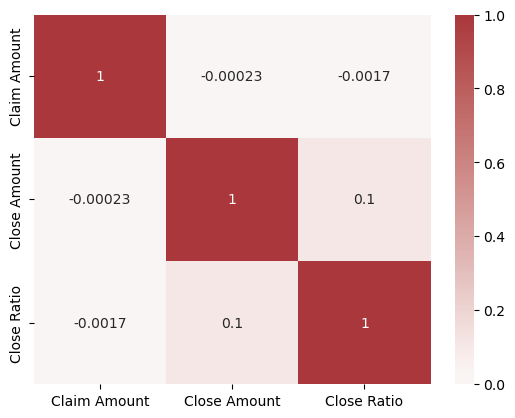

In [67]:
sns.heatmap(data=df.corr(),annot=True,cmap='vlag',center=0)

c:\Users\idamh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


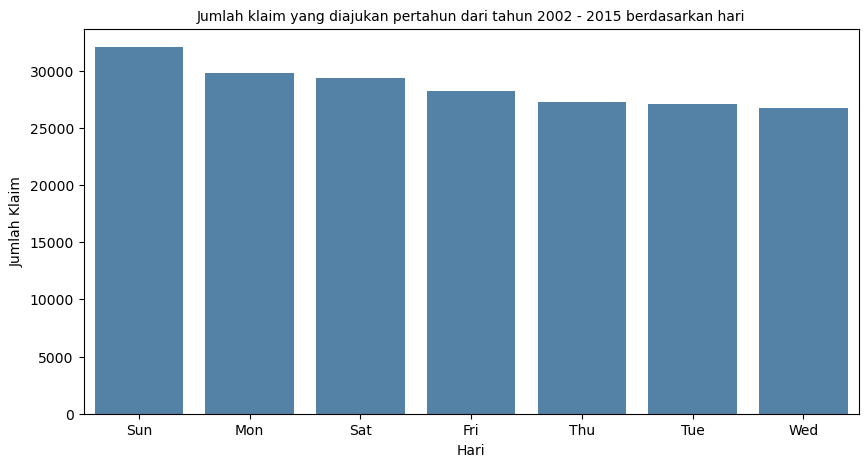

In [68]:
plt.figure(figsize=(10,5))
#plt.bar(df['incident_year'].value_counts().index, df['incident_year'].value_counts().values)
sns.barplot(df['Incident Day'].value_counts().index, df['Incident Day'].value_counts().values, color = 'steelblue')
plt.xlabel('Hari')
plt.ylabel('Jumlah Klaim')
plt.title('Jumlah klaim yang diajukan pertahun dari tahun 2002 - 2015 berdasarkan hari', size = 10)
plt.show()